#### 다중 분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

In [93]:
### 모듈 로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

# 판다스 / 넘파이에 지수 표기법 (과학적 표기법) 
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision = 6, suppress = True)

- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 ==> 1D으로 64개 피쳐
    * 이미지 라벨/타겟 => 숫자 0 ~ 9까지 즉, 총 10개 클래스
    * 흑백 이미지

In [94]:
## 데이터 로딩
featureDF, targetSR = load_digits(as_frame = True, return_X_y = True)

# 이미지 픽셀 : 0 ~ 255 범위
featureDF = featureDF / 255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [95]:
featureDF.head(1), targetSR.head()

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   
 
    pixel_7_6  pixel_7_7  
 0    0.00000    0.00000  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int32)

(8, 8)


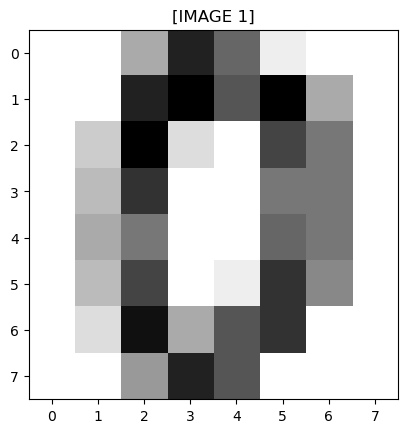

In [96]:
## 이미지 데이터 시각화
import matplotlib.pyplot as plt

# 1D ==> 2D 형태로 이미지 데이터
imgData = featureDF.iloc[0].to_numpy().reshape(-1, 8)
print(imgData.shape)

# 시각화
plt.imshow(imgData, cmap = 'binary')
plt.title(f'[IMAGE {targetSR[1242]}]')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS


In [97]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    stratify = targetSR,
                                                    random_state = 10)

In [98]:
featureDF.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,...,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000
mean,0.00000,0.00119,0.02041,0.04642,0.04646,0.02267,0.00534,0.00051,0.00002,0.00782,...,0.01461,0.00081,0.00000,0.00110,0.02179,0.04741,0.04631,0.02653,0.00811,0.00143
std,0.00000,0.00356,0.01865,0.01666,0.01681,0.02222,0.01304,0.00407,0.00037,0.01253,...,0.01929,0.00386,0.00009,0.00366,0.02001,0.01716,0.01935,0.02314,0.01604,0.00729
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00392,0.03922,0.03922,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00392,0.04314,0.03922,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.01569,0.05098,0.05098,0.01569,0.00000,0.00000,0.00000,0.00000,...,0.00392,0.00000,0.00000,0.00000,0.01569,0.05098,0.05490,0.02353,0.00000,0.00000
75%,0.00000,0.00000,0.03529,0.05882,0.05882,0.04314,0.00000,0.00000,0.00000,0.01176,...,0.02745,0.00000,0.00000,0.00000,0.03922,0.06275,0.06275,0.04706,0.00784,0.00000
max,0.00000,0.03137,0.06275,0.06275,0.06275,0.06275,0.06275,0.05882,0.00784,0.06275,...,0.06275,0.05098,0.00392,0.03529,0.06275,0.06275,0.06275,0.06275,0.06275,0.06275


- OvR(Over vs Rest) 또는 OvA(Over vs All)
    * 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택

In [99]:
# 모듈 로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter= 1000))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [100]:
# 모델 파라미터
print(f'ovr_clf.estimators_ : {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_ : {ovr_clf.classes_}')
print(f'ovr_clf.classes_ : {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_}')

ovr_clf.estimators_ : 10개
ovr_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.classes_ : 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [101]:
np.set_printoptions(precision = 6, suppress = True)
pd.options.display.float_format = '{:.5f}'.format

for idx in range(ovr_clf.n_classes_):
    print(f'[{idx} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[0 분류기] [[ 0.       -0.117211 -0.361977  0.637993 -0.259516 -1.280042 -0.549555
  -0.051539 -0.002489 -0.450771  0.87553   0.67567   0.761063  1.421815
  -0.372707 -0.047908 -0.000876  0.483967  1.735262 -0.566662 -1.827955
   2.027963  0.680701 -0.023    -0.000234  1.171667  1.431241 -2.773392
  -4.069452  0.621786  1.751173 -0.001039  0.        1.440423  1.660744
  -3.354668 -4.168379 -0.182033  1.700054  0.       -0.006227  0.753401
   2.703978 -2.235013 -2.415652  1.074093  0.919099 -0.012728 -0.001924
   0.023211  2.278424  0.391211  0.569341  1.801441 -0.651051 -0.079346
  -0.000345 -0.112692 -0.545168  0.615148  0.574332 -0.674338 -0.772614
  -0.134407]] [-2.294685]
[1 분류기] [[ 0.       -0.143074 -1.132225 -1.180677 -0.866008  0.169236 -0.195313
  -0.061496 -0.003632 -0.881948 -2.792764  0.176256  1.541474  0.322755
  -0.319918 -0.054061 -0.001149 -0.63731  -1.214654  3.468259  3.133466
  -0.135821 -0.452731 -0.026653 -0.000552 -0.068647  0.070149  2.400616
   1.588896 -0.631002 

In [102]:
ovr_clf.predict_proba(X_test.iloc[:5])

array([[0.078773, 0.07785 , 0.117592, 0.192254, 0.046543, 0.106452,
        0.083023, 0.069872, 0.090864, 0.136776],
       [0.118287, 0.06343 , 0.079839, 0.154541, 0.065147, 0.109963,
        0.053017, 0.081382, 0.092324, 0.182071],
       [0.084959, 0.088617, 0.068084, 0.082259, 0.115483, 0.119781,
        0.059759, 0.182085, 0.093229, 0.105745],
       [0.091834, 0.120828, 0.090487, 0.07607 , 0.093198, 0.107746,
        0.073511, 0.099876, 0.156594, 0.089856],
       [0.076719, 0.089289, 0.067654, 0.049526, 0.183028, 0.122536,
        0.104075, 0.143747, 0.085631, 0.077795]])

In [103]:
ovr_clf.predict(X_test.iloc[:5])

array([3, 9, 7, 8, 4])

In [104]:
# print(X_train.iloc[:1], y_train[y_train.index[0]])

# decision_functions = []
# for idx in range(ovr_clf.n_classes_):
#     decision_functions.append(ovr_clf.estimators_[idx].)